#Ejercicios

- Pruebe otras combinaciones de kernels para entrenar el regresor.

- Estudie la influencia del hiperparámetro alpha en los resultados.

- Entrene un regresor por procesos Gaussianos para la señal del punto 2.3 del [P1_CursoDirigido_Seminario_Pos.pdf](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/Parciales/P1_CursoDirigido_Seminario_Pos.pdf).



Sea la señal:

$$
t_n = A \sin(2\pi F_1 x_n) + B \cos(2\pi F_2 x_n) + \eta_n, \quad A, B \in \mathbb{R}
$$

contaminada con ruido blanco Gaussiano con $$ \text{SNR}_{\text{db}} = 2 \text{[dB]} $$. Asuma un mapeo $$ \phi(\cdot) $$ del tipo RBF, definido como:

$$
\phi(x_n) = [\mathcal{N}(x_n|\mu_q, \sigma_q^2)]_{q=1}^{Q}
$$

donde $$ Q = 20 $$, y

$$
p(w) = \mathcal{N}(w|m_0, S_0)
$$

Se deben simular 100 datos para entrenar los modelos y 20 para predecir, incluyendo un ciclo de la señal estudiada en la simulación.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF , Matern, DotProduct, WhiteKernel

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler



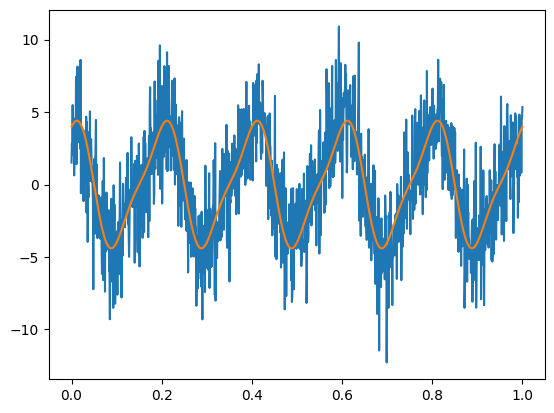

In [6]:
def var_snr(x,snrdB):
    Px = np.mean(x**2)
    return Px/(10**(snrdB/10))

N = 1200
f1 = 10
f2 = 5
A = 1
B = 4
snrdB = 2

t = np.linspace(0,1,N)
sig = A*np.sin(2*np.pi*f1*t) + B*np.cos(2*np.pi*f2*t)

var_noise = var_snr(sig, snrdB)

y = sig + np.random.normal(0, np.sqrt(var_noise), N)

plt.plot(t,y)
plt.plot(t,sig)
plt.show()

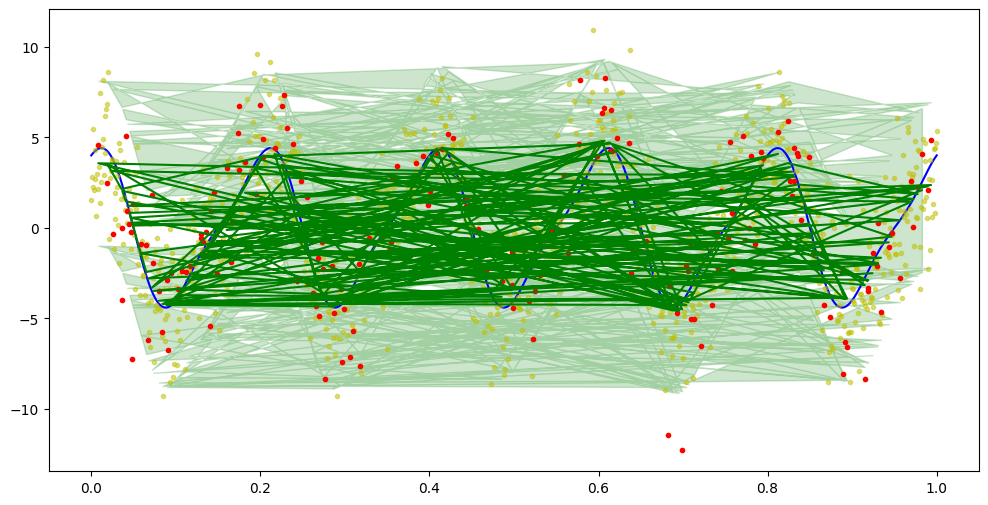

In [8]:
# Train-test split
X = t.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1000, test_size=200, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


kernel = 1.0 * RBF(length_scale=0.1) + WhiteKernel(noise_level=0.1)


gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, random_state=42)
gpr.fit(X_train_scaled, y_train)


y_pred, sigma = gpr.predict(X_test_scaled, return_std=True)


plt.figure(figsize=(12, 6))
plt.plot(t, sig, 'b-', label='Señal original')
plt.plot(t, y, 'y.', alpha=0.5, label='Señal con ruido')
plt.plot(X_test, y_test, 'r.', label='Datos de prueba')
plt.plot(X_test, y_pred, 'g-', label='Predicción GPR')
plt.fill_between(X_test.ravel(), y_pred - 1.96*sigma, y_pred + 1.96*sigma, alpha=0.2, color='g')
plt.show()
